# Voronoi diagrams
This notebook was translated from [ImageJ Macro](https://clij.github.io/clij2-docs/md/voronoi/).

It shows how to create a Voronoi diagram out of a binary image in the GPU.

## Initialize GPU

In [1]:
import pyclesperanto_prototype as cle

from skimage.io import imread, imsave, imshow
import matplotlib
import numpy as np

# initialize GPU
cle.select_device("GTX")

<Intel(R) Iris(R) Xe Graphics on Platform: Intel(R) OpenCL HD Graphics (1 refs)>

## Get example data and push it to the GPU

cl.OCLArray([[ 40.,  32.,  24., ..., 216., 200., 200.],
       [ 56.,  40.,  24., ..., 232., 216., 216.],
       [ 64.,  48.,  24., ..., 240., 232., 232.],
       ...,
       [ 72.,  80.,  80., ...,  48.,  48.,  48.],
       [ 80.,  80.,  80., ...,  48.,  48.,  48.],
       [ 96.,  88.,  80., ...,  48.,  48.,  48.]], dtype=float32)
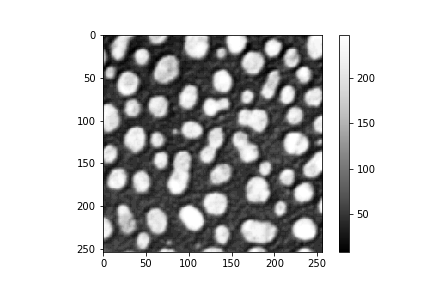
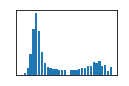

In [2]:
# load data
image = cle.asarray(imread('https://samples.fiji.sc/blobs.png'))
image

In [3]:
## Binarze image first

cl.OCLArray([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
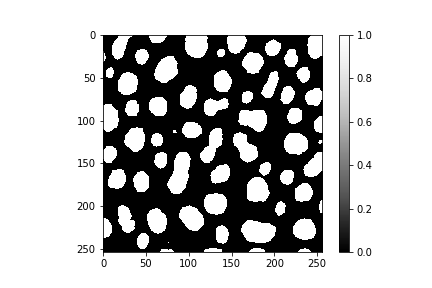
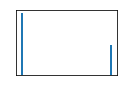

In [4]:
binary = cle.greater_constant(image, constant=128)
binary

In [5]:
## Label objects and fill gaps between them

cl.OCLArray([[ 7,  7,  7, ..., 60, 60, 60],
       [ 7,  7,  7, ..., 60, 60, 60],
       [ 7,  7,  7, ..., 60, 60, 60],
       ...,
       [ 4,  4,  4, ..., 57, 57, 57],
       [ 4,  4,  4, ..., 57, 57, 57],
       [ 4,  4,  4, ..., 57, 57, 57]], dtype=uint32)
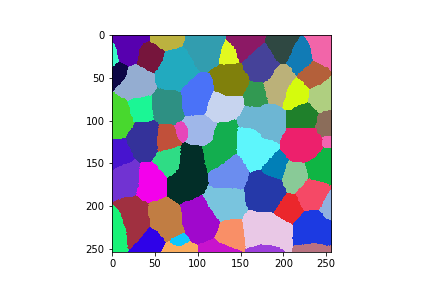

In [6]:
labels = cle.voronoi_labeling(binary)
labels

## Make binary voronoi diagram edge image

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
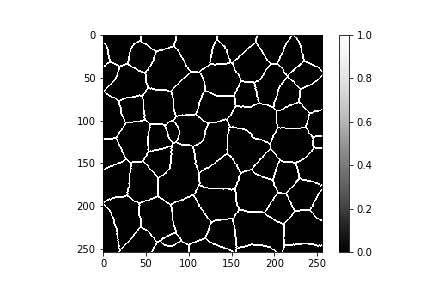
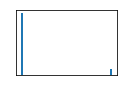

In [7]:
voronoi = cle.detect_label_edges(labels)
voronoi